<a href="https://colab.research.google.com/github/SiddhanthNB/Titanic-EDA/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('https://github.com/SiddhanthNB/Titanic-EDA/raw/main/Data/train.csv',index_col=0)
titanic_data = data.copy()

In [3]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


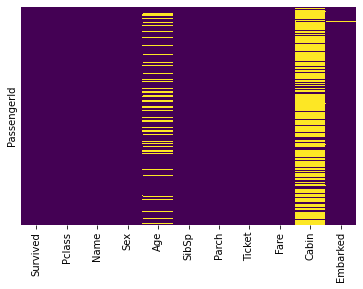

In [6]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
def child(passenger):
    age = passenger['Age']
    sex = passenger['Sex']
    
    return 'child' if age < 16 else sex

titanic_data['Person'] = titanic_data.apply(child,axis=1)

In [8]:
titanic_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female


In [9]:
titanic_data['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

In [10]:
for i in titanic_data.Person.unique()  :  
  var = titanic_data.loc[titanic_data.Person == i]["Survived"]
  temp = len(var)
  if temp>0 :
    rate = round((sum(var)/temp)*100,3)
    print("Percentage of ",i," who survived:", rate,"%")


Percentage of  male  who survived: 16.387 %
Percentage of  female  who survived: 75.646 %
Percentage of  child  who survived: 59.036 %


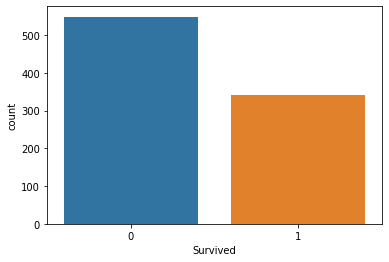

In [11]:
sns.countplot(x='Survived',data=titanic_data)

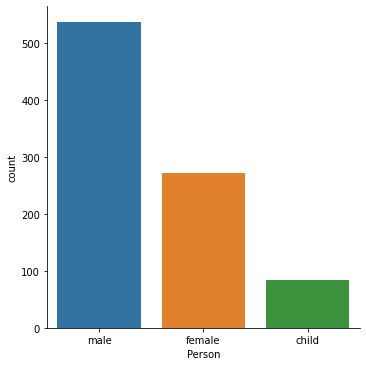

In [12]:
sns.catplot(x='Person',data=titanic_data,kind='count')

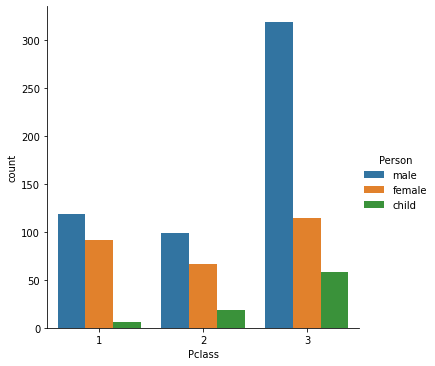

In [13]:
sns.catplot(x='Pclass',data=titanic_data,hue='Person',kind='count')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


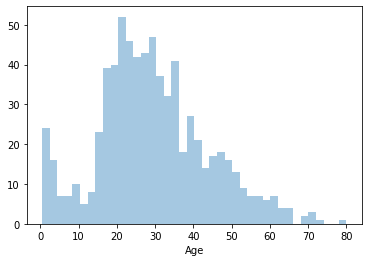

In [14]:
sns.distplot(titanic_data['Age'].dropna(),kde=False,bins=40)

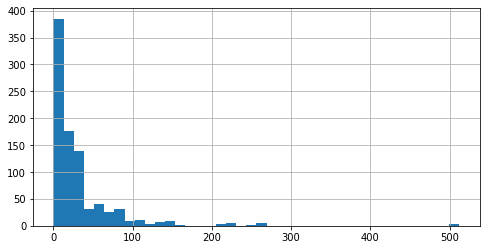

In [15]:
titanic_data['Fare'].hist(bins=40,figsize=(8,4))

In [16]:
deck_data = titanic_data.dropna(axis=0)

In [17]:
def cabin_level(passenger):
    cabin=passenger['Cabin'][0]
    return cabin

deck_data['level']=deck_data.apply(cabin_level,axis=1)

deck_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,level
PassengerId,,,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,E
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,G
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,C


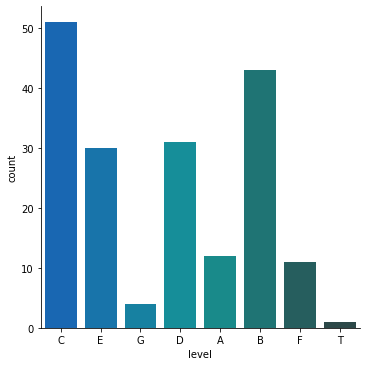

In [18]:
sns.catplot(x='level',data=deck_data,palette='winter_d',kind='count')

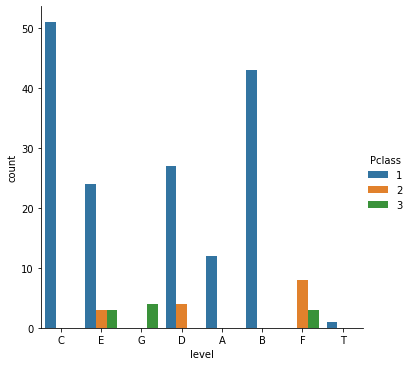

In [19]:
sns.catplot(x='level',data=deck_data,hue='Pclass',kind='count')

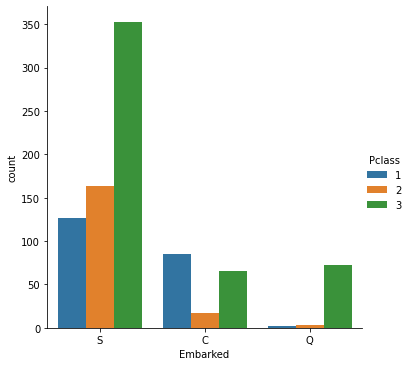

In [20]:
sns.catplot(x='Embarked',data=titanic_data,hue='Pclass',kind='count')

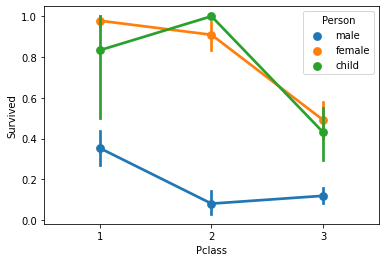

In [21]:
sns.pointplot(x='Pclass',y='Survived',hue='Person',data=titanic_data)

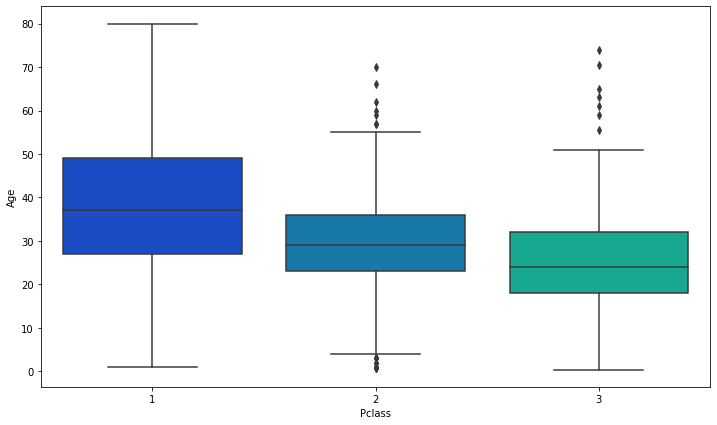

In [22]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic_data,palette='winter')

In [23]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]
    
  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24
  else:
    return Age

titanic_data['Age'] = titanic_data[['Age','Pclass']].apply(impute_age,axis=1)

In [24]:
titanic_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q,male
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female


In [25]:
titanic_data.drop(['Name','Sex','Ticket','Cabin'],axis=1,inplace=True)

In [26]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Person
PassengerId,,,,,,,,
1,0,3,22.0,1,0,7.2500,S,male
2,1,1,38.0,1,0,71.2833,C,female
3,1,3,26.0,0,0,7.9250,S,female
4,1,1,35.0,1,0,53.1000,S,female
5,0,3,35.0,0,0,8.0500,S,male


In [27]:
titanic_data = pd.get_dummies(titanic_data, columns = ['Embarked', 'Person'], drop_first = True)
titanic_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Person_female,Person_male
PassengerId,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,1,0
3,1,3,26.0,0,0,7.9250,0,1,1,0
4,1,1,35.0,1,0,53.1000,0,1,1,0
5,0,3,35.0,0,0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,0,1,0,1
888,1,1,19.0,0,0,30.0000,0,1,1,0
889,0,3,24.0,1,2,23.4500,0,1,1,0


In [28]:
X = titanic_data.drop('Survived',axis=1) 
y = titanic_data['Survived']

In [29]:
from sklearn import preprocessing
X = preprocessing.scale(X)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state=101)

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
predictions = model.predict(X_test)
predictions

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1])

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
cm

array([[137,  17],
       [ 35,  79]])

In [34]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,predictions)
accuracy

0.8059701492537313

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       154
           1       0.82      0.69      0.75       114

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268



In [36]:
test_data = pd.read_csv('https://github.com/SiddhanthNB/Titanic-EDA/raw/main/Data/test.csv',index_col= 0)

In [37]:
test_data['Age'] = test_data[['Age','Pclass']].apply(impute_age,axis=1)
test_data['Person'] = test_data.apply(child,axis=1)

In [38]:
test_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,male
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,female
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,male
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,male
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,female
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,NaN,S,male
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,female
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,male


In [39]:
test_data.drop(['Name','Sex','Ticket','Cabin'],axis=1,inplace=True)

In [40]:
test_data = test_data.dropna()

In [41]:
test_data = pd.get_dummies(test_data, columns = ['Embarked', 'Person'], drop_first = True)
test_data

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Person_female,Person_male
PassengerId,,,,,,,,,
892,3,34.5,0,0,7.8292,1,0,0,1
893,3,47.0,1,0,7.0000,0,1,1,0
894,2,62.0,0,0,9.6875,1,0,0,1
895,3,27.0,0,0,8.6625,0,1,0,1
896,3,22.0,1,1,12.2875,0,1,1,0
...,...,...,...,...,...,...,...,...,...
1305,3,24.0,0,0,8.0500,0,1,0,1
1306,1,39.0,0,0,108.9000,0,0,1,0
1307,3,38.5,0,0,7.2500,0,1,0,1


In [42]:
predictions_test = model.predict(test_data)
predictions_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,